# GenAI with Python: LLM Agents

### Text - LLM

In [2]:
from langchain_community.llms import Ollama

llm = Ollama(model="phi3")
res = llm.invoke(input=["What day is today?"]).split("\n")[0]
print(res)

 As an AI, I don't have real-time capabilities. However, to find out the current date, you can check your device calendar or ask a voice-activated assistant like Google Assistant, Siri, or Amazon Alexa for this information.


In [7]:
from langchain.tools import DuckDuckGoSearchResults

DuckDuckGoSearchResults().run("What day is today?")

"[snippet: Find out the date, time zone, day number, week number, month number, leap year, daylight saving time, and more for today's date. See also the sunrise, sunset, moonrise, moonset, moonphase, season, zodiac sign, and upcoming holidays for today., title: Today's Date - CalendarDate.com, link: https://www.calendardate.com/todays.htm], [snippet: Find out what day is today and what holidays and celebrations are coming up in the United States. See the calendar for 2024 and 2025 with moon phases, week numbers, and online calendars., title: Calendar (What Day is Celebrated Today?) - Calendarr, link: https://www.calendarr.com/united-states/], [snippet: National Today is a website that lists various holidays and celebrations for each day of the year. It does not show the current date or the day of the week, but it does have a calendar and a search function to find specific dates., title: National Today, link: https://nationaltoday.com/], [snippet: Find out today's date, day number, week

In [25]:
from langchain_community.tools import DuckDuckGoSearchRun

DuckDuckGoSearchRun().run("What day is today?")

"Find out the date, time zone, day number, week number, month number, leap year, daylight saving time, and more for today's date. See also the sunrise, sunset, moonrise, moonset, moonphase, zodiac sign, birthstone, birth flower, and upcoming holidays for today. Find out what day is today and what holidays and celebrations are coming up in the United States. See the calendar for 2024 and 2025 with moon phases, week numbers and more. Find out what holidays and events are happening today, tomorrow, or any date in the future. Browse by month, category, or keyword and discover fun facts, reviews, gifts, and more. Find out today's date, calendar, and date calculator for any day in the future or past. See the current date, month, week, and year, and print or download calendars for June and July 2024. What is the date today? Today's Date is June 30th, 2024.. Today's Date in My Local Timezone. June 30, 2024, 12:58 pm. What is the day name of the today's date? Sunday"

### Text - Agent

In [26]:
#!pip install "crewai[tools]"
from crewai_tools import tool

@tool
def browser(q: str) -> str:
    """DuckDuckGo browser"""
    return DuckDuckGoSearchRun().run(q)

In [22]:
import crewai

agent = crewai.Agent(
            role="Calendar", 
            goal="find out what day is today",
            backstory="you are a calendar assistant, you tell information about dates.",
            verbose=False, allow_delegation=False,
            tools=[browser], llm=llm)

task = crewai.Task(agent=agent, description="date", expected_output="today's date")
crew = crewai.Crew(agents=[agent], tasks=[task], verbose=0)
res = crew.kickoff()
print("Res:", res)

2024-06-29 19:37:48,057 - 140704578535360 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


 

Find out the current date, time zone, day number, week number, month number, leap year, daylight saving time, and more. See today's date in different formats and learn about upcoming holidays and zodiac signs. Find out what day is it today and what holidays and celebrations are coming up in the United States. See the calendar for 2024 and 2025 with moon phases, week numbers and online calendars. Your clock is 0.7 seconds behind. Accuracy of synchronization was ±0.276 seconds. Time in New York, United States now: 12:22:20am. Friday, June 28, 2024. Sun: ↑ 05:26AM ↓ 08:33PM (15h 7m) - More info - Make New York time default - Add to favorite locations. Tokyo. Find out the current date and time in different formats and time zones. Learn how many days are left in the week, month and year, and explore other useful time tracking tools. How To Calculate Today's Date Using Excel or Sheets. You can also calculate the current date using spreadsheet software such as Google Sheets or Microsoft Ex

### Images - LLM

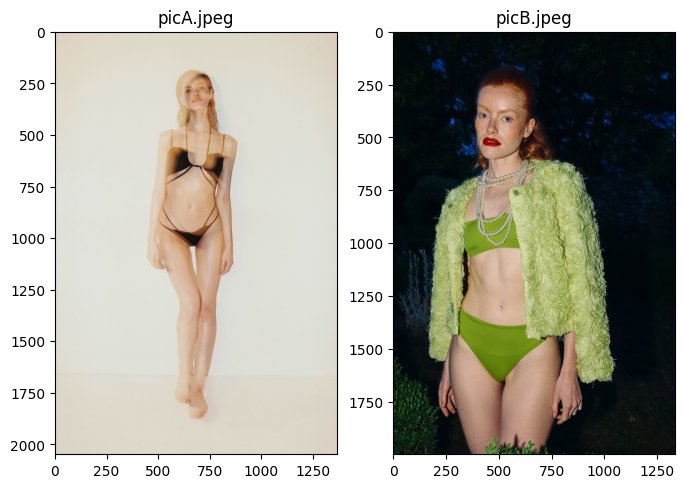

In [12]:
from matplotlib import image, pyplot
import os

path = 'data/'
folder = os.listdir(path)

fig, ax = pyplot.subplots(nrows=1, ncols=len(folder), sharex=False, sharey=False, figsize=(4*len(folder),10))
for n,file in enumerate(folder):
    ax[n].imshow(image.imread(path+file))
    ax[n].set(title=file)

In [14]:
## Encode images into a string
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

lst_imgs = [encode_image(path+i) for i in folder]
len(lst_imgs)

2

In [15]:
llm = Ollama(model="llava")
res = llm.invoke(input=["Describe all the pictures"], images=lst_imgs)
print(res)

 This is a composite image showing a woman in two separate photos. On the left, there is a close-up photo of the woman standing against a wall. She is wearing a bright green top and light blue bottoms, with her hair styled into what appears to be a short bob. The background is nondescript, focusing attention on the clothing and her pose.

On the right side of the image, there is another photo showing the same woman in an outdoor setting at night. She has changed her outfit; she's now wearing a strapless bikini top, a white cropped top that resembles a criss-crossed pattern over a black bra, and matching green bottoms. The lighting is soft, and there are no discernible features of the surroundings beyond a hint of greenery in the background.

The style of the image is a standard photographic format with naturalistic colors, likely intended to showcase the clothing in both daylight and nighttime scenarios. 


In [36]:
llm = Ollama(model="llava")

prompt = '''First you need to decide which picture will get more likes on Instagram and explain why.
            Then you need to write a caption that would maximize the conversion rate based on the image you chose.'''

res = llm.invoke(input=[prompt], images=lst_imgs)
print(res)

 Picture Selection:
I would choose the second image for a higher likelihood of getting more likes on Instagram. The reasons include:

1. Color Contrast: The yellow bikini stands out against the green top, which makes it visually appealing and draws attention.
2. Outfit Composition: The two-piece bikini is a bold choice, and the lace cover-up adds an interesting textural element that breaks up the solid color of the top.
3. Lighting: The lighting in this image appears to be more evenly distributed, creating a brighter and more flattering overall look.
4. Pose: The pose in the second image is slightly more dynamic with the arms slightly apart, which adds to the confidence portrayed by the model.
5. Facial Expression: The facial expression in the second image is subtler and less distracting than the first image's pose.

Caption Maximizing Conversion Rate:
"Embrace summer vibes with this chic two-piece bikini set! 🔥🏊‍♂️ Perfect for a sunny day by the beach or poolside. Swipe right to shop 

### Images - Agent

In [23]:
@tool
def get_images():
    """Encode images"""
    path = 'data/'
    folder = os.listdir(path)
    return [encode_image(path+i) for i in folder]

In [29]:
agent = crewai.Agent(
            role="Influencer", 
            goal="Choose the picture that will get more likes on Instagram",
            backstory="You are an influencer and social media manager that maximizes the conversion rate of every post",
            verbose=True, allow_delegation=False,
            tools=[get_images, browser], llm=llm)

task = crewai.Task(agent=agent, description="choose a picture", expected_output="picture number")
crew = crewai.Crew(agents=[agent], tasks=[task], verbose=2)
res = crew.kickoff()
print("Res:", res)

2024-07-01 22:53:44,270 - 140704296546240 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


 [2024-07-01 22:53:44][DEBUG]: == Working Agent: Influencer
 [2024-07-01 22:53:44][INFO]: == Starting Task: choose a picture


> Entering new CrewAgentExecutor chain...
 Action: get_images()
Action Input: {} 

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAgABVYDASIAAhEBAxEB/8QAGgABAQEBAQEBAAAAAAAAAAAAAAECAwQFBv/EABcBAQEBAQAAAAAAAAAAAAAAAAABAgP/2gAMAwEAAhADEAAAAvuReepQACgAAFQspEoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlCUAAAAEoAAASgBKAEUIKCLBQlBFIUiwAAAAAAAAAAAEAAAAVLIAAA0AAAAKAWUlESgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAAAAAAAAAAAAAAAAJQAAASgQKBBUAAAAAAAACUARRAAASlgAgDQAAAoBYLBCgAAAAAAAAAAAAAAAAAAAAAABYAFgAAAAAAAAAAAAAAAAAAAAAAAAAAAlAAABKAIUhSFIAAAAAAABKIAABFEpYIA0AAKFIsKESglAAAAAAAAAAAACwAAALAAsABSUEoiwFIUiwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAihLAoiwWAsAAAAAEsCwAAAlhbACNAAClEAJQAAAAAABYFgAWABYACwLCywFEUgLLCyhAoJQAlCLCygCVAsLAAA

KeyboardInterrupt: 

### Multiple Agents

In [33]:
class Agents():

    def agent_manager(self):
        return crewai.Agent(
            role="Manager of the other Agents",
            goal='''Oversee the post creation process, including: process the images,
             choose the best picture that that maximizes the likes of the post,
             and write the best caption that maximizes the conversion rate for the post.
             ''',
            backstory='''As the manager of the process, you follow every step to create the perfect Instagram post:
             1-Read the images from the folder and encode them into a base64 string with the Photograper.
             2-Choose the picture that would get more likes on Instagram with the Producer.
             3-Write a caption for the post that would maximize the conversion rate on Instagram based on the image with the Social Media Manager.

             At the end of the process, you MUST show the final post to the human and ask for final approval.
             DO NOT ask the human to create the post for you.
             ''',
            allow_delegation=True,
            tools = [tool_human],
            verbose=True)
    
    def agent_photograper(self):
        return crewai.Agent(
            role="Photographer",
            goal='''Read the images from the folder and encode them into a base64 string.''',
            backstory='''As the Photographer, you must read the images from the folder
             and encode them into a base64 string so that the LLM can process them.
             ''',
            allow_delegation=True,
            tools = [tool_photos],
            verbose=True)
    
    def agent_producer(self):
        return crewai.Agent(
            role="Producer",
            goal='''Choose the picture that would get more likes on Instagram.''',
            backstory='''As the Producer, you need to understand which picture would get more likes on Instagram,
             make more people interact with the post, and maximize the conversion rate.
             You consider also the current season, today's date, any particular events of this month.
             ''',
            allow_delegation=True,
            tools = [tool_browser],
            verbose=True)

    def agent_socialmedia(self):
        return crewai.Agent(
            role="Social Media Manager",
            goal='''Write a caption for the post that would maximize the conversion rate on Instagram based on the image.''',
            backstory='''As the Social Media Manager, you must generate a caption based on the picture 
             that would get more likes on Instagram, make more people interact with the post, and maximize the conversion rate.
             You consider also the current season, today's date, any particular events of this month.
             ''',
            allow_delegation=True,
            tools = [tool_browser],
            verbose=True)

agents = Agents()

In [ ]:
class Tasks():
    
    def task_manager(self):
        return crewai.Task(
            description='''Oversee the post creation process, including: process the images,
             choose the best picture that that maximizes the likes of the post,
             and write the best caption that maximizes the conversion rate for the post.
             '''
            

    def task_photograper(self):

    def task_producer(self):

    def task_socialmedia(self):
        